In [2]:
import os,sys,re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from itertools import product
#import pickle5 # Need pickle5 for DataFrame pickles
from scipy.stats import linregress,sem
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mue
import seaborn as sns
from natsort import natsorted as ns
from natsort import *
import matplotlib as mpl
import multiprocessing as mp
cpus = mp.cpu_count()

ModuleNotFoundError: No module named 'seaborn'

In [2]:
def scaler(df):
    new_df = (df-np.mean(df.values))/np.std(df.values)
    return new_df

In [3]:
A8 = pd.read_pickle('../../data/EE/A8_RBFE.pkl')
A13 = pd.read_pickle('../../data/EE/A13_RBFE.pkl').fillna(0)
A18 = pd.read_pickle('../../data/EE/A18_RBFE.pkl')
A8_var = pd.read_pickle('../../data/EE/A8_variance.pkl')
A13_var = pd.read_pickle('../../data/EE/A13_variance.pkl').fillna(0)
A18_var = pd.read_pickle('../../data/EE/A18_variance.pkl')
on = False
if on:
    for col in A8.columns:
        A8[col] = np.mean(A8[col].values+np.random.randn(100000,len(A8[col]))*A8_var[col].values,axis=0)
    for col in A18.columns:
        A18[col] = np.mean(A18[col].values+np.random.randn(100000,len(A18[col]))*A18_var[col].values,axis=0)
    for col in A13.columns:
        A13[col] = np.mean(A13[col].values+np.random.randn(100000,len(A13[col]))*A13_var[col].values,axis=0)

A8_old = pd.read_pickle('../../data/old_EE/A8_RBFE.pkl').fillna(0)
A13_old = pd.read_pickle('../../data/old_EE/A13_RBFE.pkl').fillna(0)
A18_old = pd.read_pickle('../../data/old_EE/A18_RBFE.pkl').fillna(0)
old_A8_var = pd.read_pickle('../../data/old_EE/A8_variance.pkl').fillna(0)
old_A13_var = pd.read_pickle('../../data/old_EE/A13_variance.pkl').fillna(0)
old_A18_var = pd.read_pickle('../../data/old_EE/A18_variance.pkl').fillna(0)

#A8_exp = pd.read_csv('A8_initial_Log10Kd_estimates_20230913.csv')
A8_exp = pd.read_pickle('../../data/Experiment/A8_exp_dg.pkl').reindex(A8.index).fillna(0)
A8_exp_unc = pd.read_pickle('../../data/Experiment/A8_exp_unc.pkl').reindex(A8.index).fillna(0)
A8_ros = pd.read_pickle('../../data/published_rosetta/A8_rosetta_data.pkl')
A8_seq = open('../../data/sequences/A8_sequence.afasta').readlines()[0].replace('\n','')
#A8_exp=transform_exp(A8_exp,A8_seq)
A8_seq =[f'{A8_seq[i]}{270+i}' for i in range(len(A8_seq))]


#A18_exp = pd.read_csv('A18_initial_Log10Kd_estimates_20230913.csv')
A18_exp = pd.read_pickle('../../data/Experiment/A18_exp_dg.pkl').reindex(A18.index).fillna(0)
A18_exp_unc = pd.read_pickle('../../data/Experiment/A18_exp_unc.pkl').reindex(A18.index).fillna(0)
A18_ros = pd.read_pickle('../../data/published_rosetta/A18_rosetta_data.pkl')
A18_seq = open('../../data/sequences/A18_sequence.afasta').readlines()[0].replace('\n','')
#A18_exp=transform_exp(A18_exp,A18_seq)
A18_seq=[f'{A18_seq[i]}{270+i}' for i in range(len(A18_seq))]


#A13_exp = pd.read_csv('A13_initial_Log10Kd_estimates_20230913.csv')
A13_exp = pd.read_pickle('../../data/Experiment/A13_exp_dg.pkl').reindex(A13.index).fillna(0)
A13_exp_unc = pd.read_pickle('../../data/Experiment/A13_exp_unc.pkl').reindex(A13.index).fillna(0)
A13_ros = pd.read_pickle('../../data/published_rosetta/A13_rosetta_data.pkl')
A13_seq = open('../../data/sequences/A13_sequence.afasta').readlines()[0].replace('\n','')
#A13_exp=transform_exp(A13_exp,A13_seq)
A13_seq =[f'{A13_seq[i]}{270+i}' for i in range(len(A13_seq))]

# Fix Rosetta A8 Df
A8_ros_pub = pd.read_csv('../../data/published_rosetta/norm_final_A8_rosetta.csv')
A8_ros_pub = test.rename(columns={A8_ros_pub.columns[0]:''}) 
A8_ros_pub.set_index(A8_ros_pub.columns[0])

# Fix Rosetta A13 Df
A13_ros_pub = pd.read_csv('../../data/published_rosetta/norm_final_A13_rosetta.csv')
A13_ros_pub = A13_ros_pub.rename(columns={A13_ros_pub.columns[0]:''}) 
A13_ros_pub.set_index(A13_ros_pub.columns[0])

# Fix Rosetta A18 Df
A13_ros_pub = pd.read_csv('../../data/published_rosetta/norm_final_A18_rosetta.csv')
A13_ros_pub = A18_ros_pub.rename(columns={A18_ros_pub.columns[0]:''}) 
A13_ros_pub.set_index(A18_ros_pub.columns[0])


A8_curr_ros = pd.read_csv('../../data/current_rosetta/A8_current_rosetta.csv')
A13_curr_ros = pd.read_csv('../../data/current_rosetta/A13_current_rosetta.csv')
A18_curr_ros = pd.read_csv('../../data/current_rosetta/A18_current_rosetta.csv')

def make_df(output,temp):
    output = output[output['state']=='ddg']
    for index,row in output.iterrows():
        col = row['position_label']
        mut = row['mutation'][-1]
        val = row['total_score']
        temp[col][mut]=val
    return temp

A8_curr_ros = make_df(A8_curr_ros,A8_ros_pub.copy())
A13_curr_ros = make_df(A13_curr_ros,A13_ros_pub.copy())
A18_curr_ros = make_df(A18_curr_ros,A18_ros_pub.copy())

# Heatmaps for All (figure 5.)

In [6]:
matrices = {'A8':[A8,A8_exp,A8_curr_ros,],'A13':[A13,A13_exp,A13_curr_ros],'A18':[A18,A18_exp,A18_curr_ros]}
types=['FEP','Exp.','Ros.']
fig,axes = plt.subplots(3,3,figsize=(40,20),dpi=300)
ax_list = list(axes.flat)
for i,(key,value) in enumerate(matrices.items()):
    for j,val in enumerate(value):
        #val = scaler(val)
        ax = ax_list[j+3*i]
        ax.set_facecolor("black")
        t = types[j]
        min = -2
        max = 2
        label='kcal/mol'
        sns.heatmap(val, cmap="coolwarm_r",ax=ax,vmin=min,vmax=max,annot=np.around(val.values,1), annot_kws={'fontsize': 8},cbar_kws={'label':f'({label})'})
        ax.xaxis.set_ticks_position('top')
        ax.set_title(key+' '+t,fontsize=30)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.tight_layout()
#fig.savefig('Heatmaps_figure5.png',dpi=300)

# Scatter PLots (figure 6.)

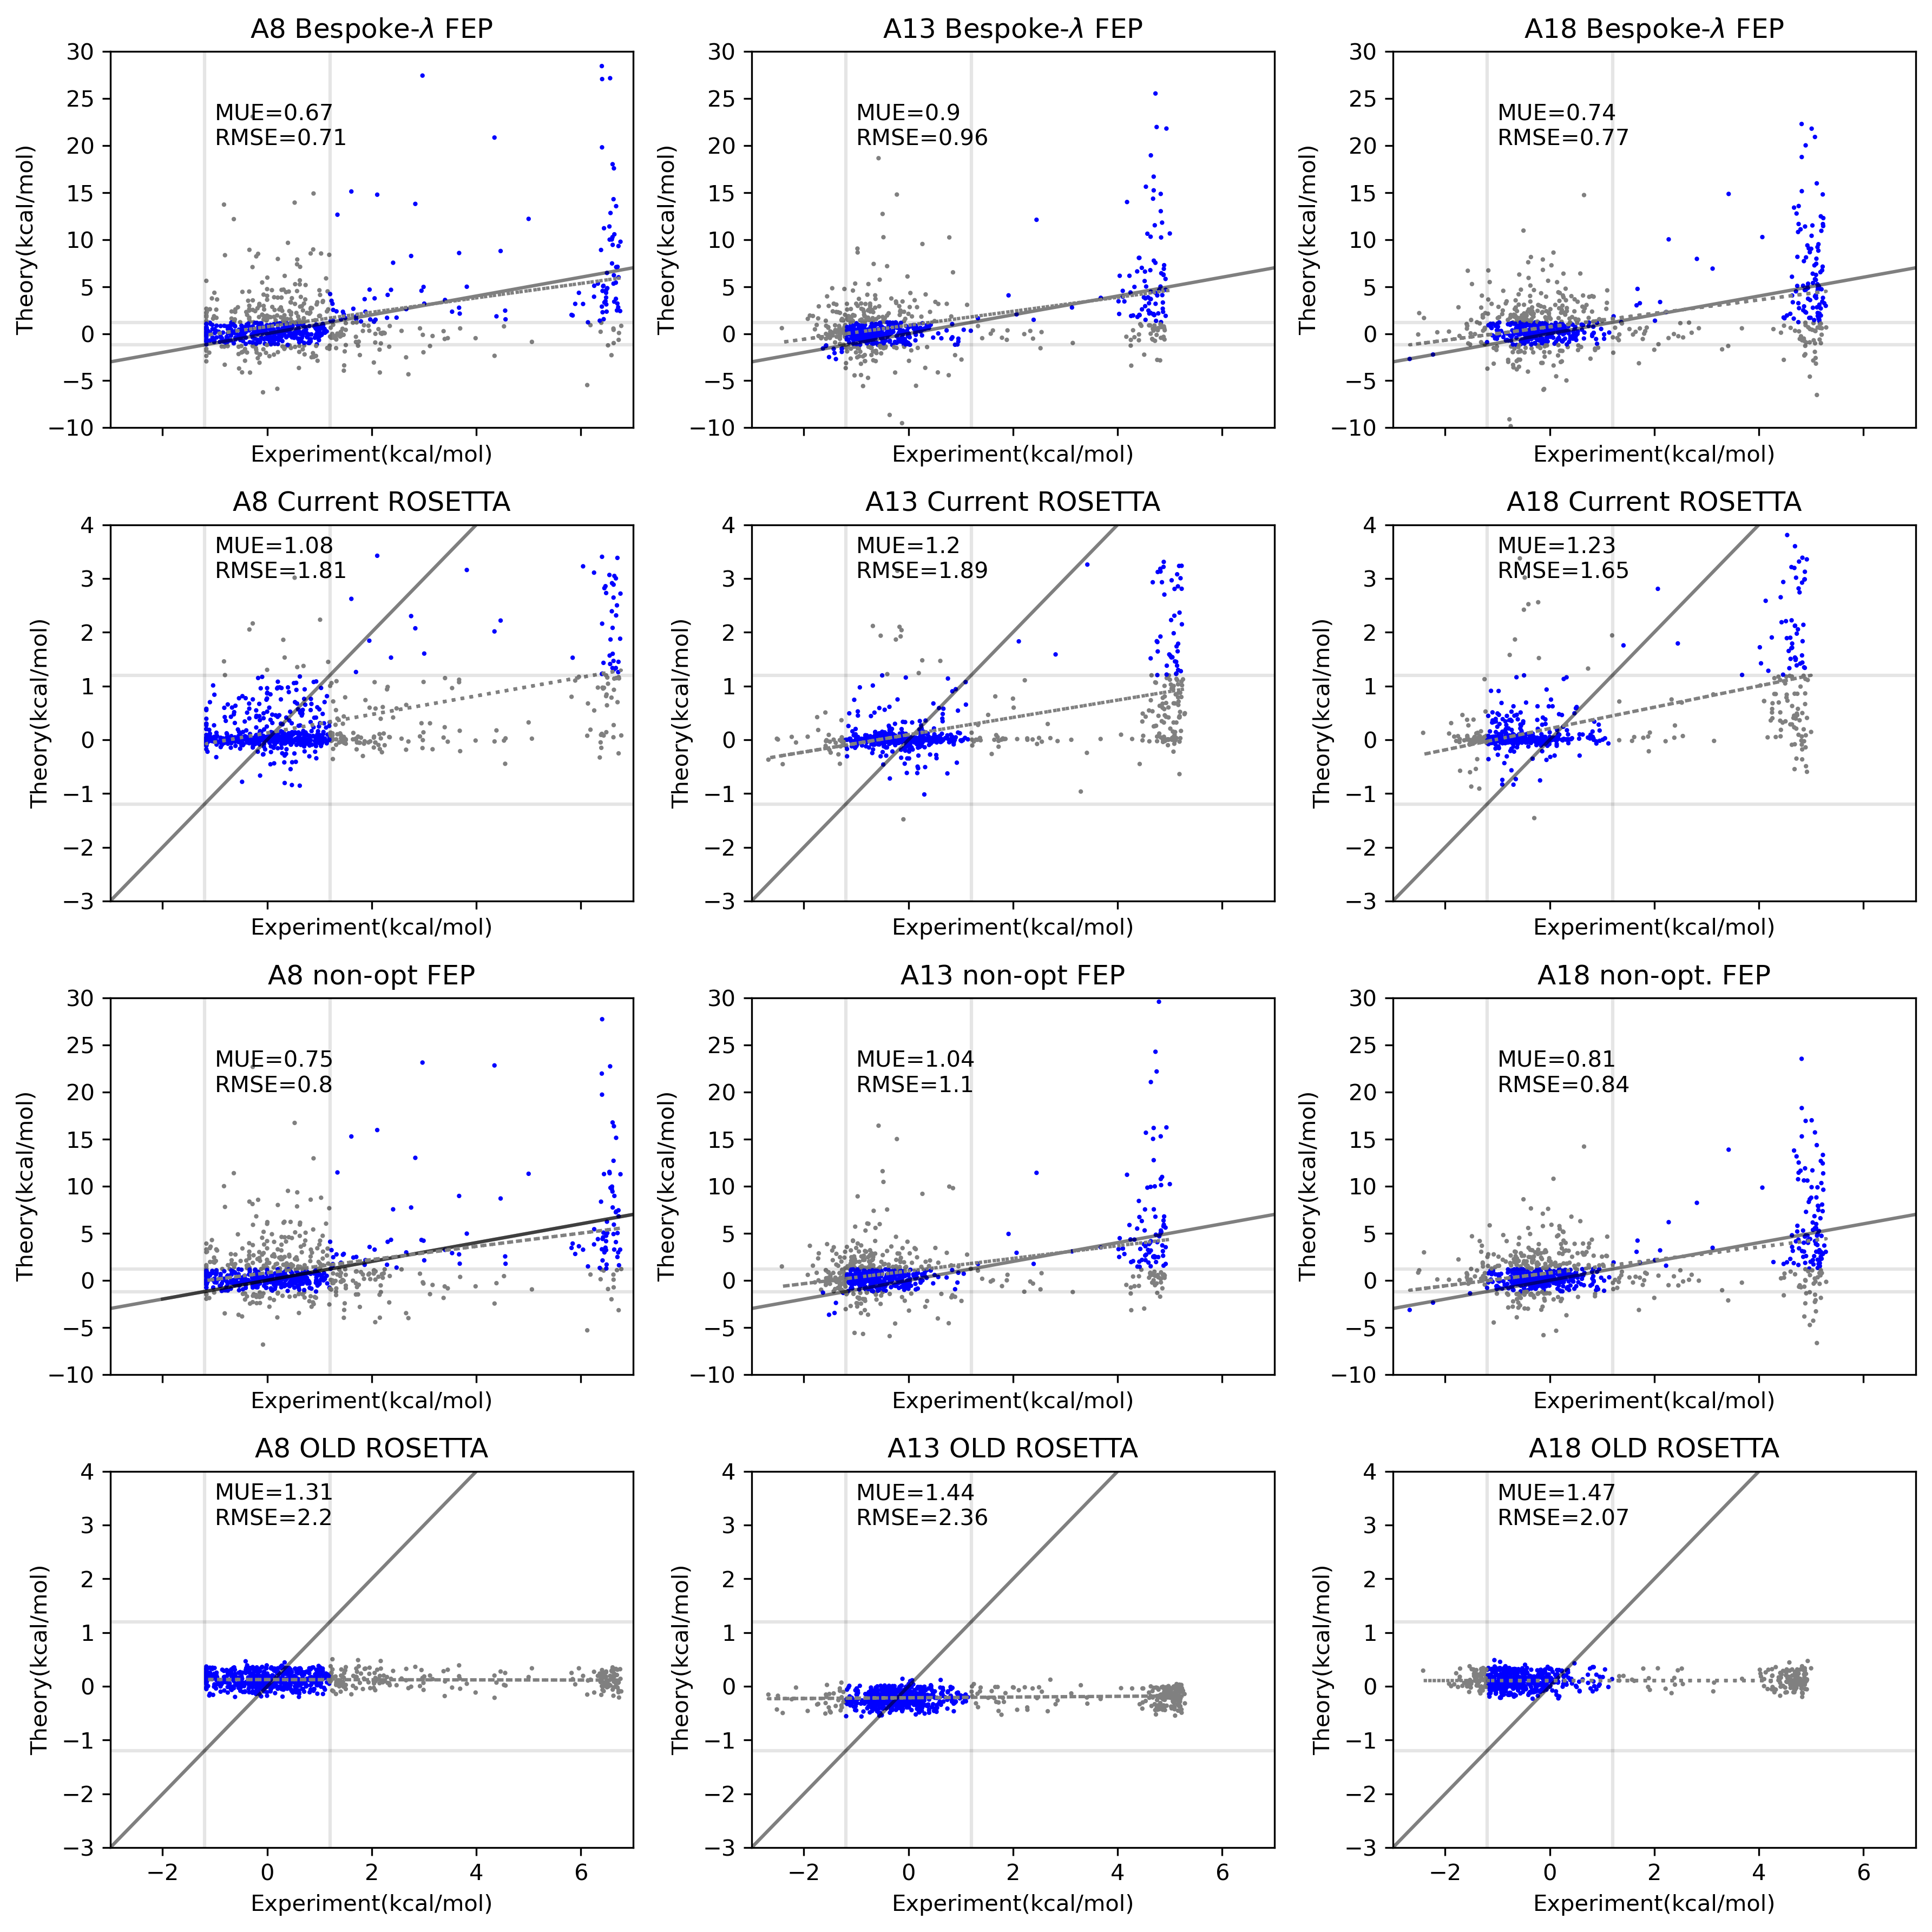

In [25]:
fig,axes = plt.subplots(4,3,figsize=(12,12),dpi=300,sharex=True)
def make_scatter(x,y,ax=None,cutoff=1.2,ros=False):
    l1 = linregress(x,y)
    MUE_fep = np.around(mue(x,l1.slope*x+l1.intercept),2)
    RMSE_fep = np.around(np.sqrt(mse(x,l1.slope*x+l1.intercept)),2)
    label = f'MUE={MUE_fep}\nRMSE={RMSE_fep}'
    c = []
    for i,j in enumerate(x):
        if (j<-cutoff) and (y[i]<-cutoff):
            c.append('b')
        elif (j>cutoff) and (y[i]>cutoff):
            c.append('b')
        elif (j>-cutoff) and (j<cutoff) and (y[i]>-cutoff) and (y[i]<cutoff):
            c.append('b')
        else:
            c.append('grey')
    ax.scatter(x,y,s=1,color=c)
    ax.plot(np.arange(-10,8),np.arange(-10,8),c='k',alpha=0.5)
    ax.plot(x,l1.slope*x+l1.intercept,linestyle=":",c='gray')
    if ros:
        ax.text(-1,3,label)
    else:
        ax.text(-1,20,label)
    
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12 = axes.flat

x,y = np.concatenate(A8_exp[A8.columns].values),np.concatenate(A8.values)
make_scatter(x,y,ax=ax1)
ax1.set_title('A8 Bespoke-$\lambda$ FEP')

x,y = np.concatenate(A13_exp[A13.columns].values),np.concatenate(A13.values)
make_scatter(x,y,ax=ax3)
ax2.set_title('A13 Bespoke-$\lambda$ FEP')

x,y = np.concatenate(A18_exp[A18.columns].values),np.concatenate(A18.values)
make_scatter(x,y,ax=ax2)
ax3.set_title('A18 Bespoke-$\lambda$ FEP')

x,y = np.concatenate(A8_exp[A8.columns].values),np.concatenate(A8_curr_ros[A8.columns].values)
make_scatter(x,y,ax=ax4,ros=True)
ax4.set_title('A8 Current ROSETTA')

x,y = np.concatenate(A13_exp[A13.columns].values),np.concatenate(A13_curr_ros[A13.columns].values)
make_scatter(x,y,ax=ax5,ros=True)
ax5.set_title('A13 Current ROSETTA')

x,y = np.concatenate(A18_exp[A18.columns].values),np.concatenate(A18_curr_ros[A18.columns].values)
make_scatter(x,y,ax=ax6,ros=True)
ax6.set_title('A18 Current ROSETTA')

ax7.plot(np.arange(-2,8),np.arange(-2,8),c='k',alpha=0.5)
x,y = np.concatenate(A8_exp[A8.columns].values),np.concatenate(A8_old.values)
make_scatter(x,y,ax=ax7)
ax7.set_title('A8 non-opt FEP')

x,y = np.concatenate(A13_exp[A13.columns].values),np.concatenate(A13_old.values)
make_scatter(x,y,ax=ax9)
ax8.set_title('A13 non-opt FEP')

x,y = np.concatenate(A18_exp[A18.columns].values),np.concatenate(A18_old.values)
make_scatter(x,y,ax=ax8)
ax9.set_title('A18 non-opt. FEP')

x,y = np.concatenate(A8_exp[A8.columns].values),np.concatenate(A8_old_ros[A8.columns].values)
make_scatter(x,y,ax=ax10,ros=True)
ax10.set_title('A8 OLD ROSETTA')

x,y = np.concatenate(A13_exp[A13.columns].values),np.concatenate(A13_old_ros[A13.columns].values)
make_scatter(x,y,ax=ax11,ros=True)
ax11.set_title('A13 OLD ROSETTA')

x,y = np.concatenate(A18_exp[A18.columns].values),np.concatenate(A18_old_ros[A18.columns].values)
make_scatter(x,y,ax=ax12,ros=True)
ax12.set_title('A18 OLD ROSETTA')



for ax in axes.flat:
    ax.vlines(1.2,-50,50,color='k',linestyle="-",alpha=0.1)
    ax.hlines(1.2,-4,8,color='k',linestyle="-",alpha=0.1)
    ax.vlines(-1.2,-50,50,color='k',linestyle="-",alpha=0.1)
    ax.hlines(-1.2,-4,8,color='k',linestyle="-",alpha=0.1)
    ax.set_xlabel('Experiment(kcal/mol)')
    ax.set_ylabel('Theory(kcal/mol)')
    
for ax in [ax1,ax2,ax3,ax9,ax7,ax8,]:
    ax.set_xlim(-3,7)
    ax.set_ylim(-10,30)
for ax in [ax4,ax5,ax6,ax10,ax11,ax12]:
    ax.set_xlim(-3,7)
    ax.set_ylim(-3,4)
    
fig.tight_layout()
#fig.savefig('scatter_all_results_figure6.png',dpi=300)